In [ ]:
# default_exp helpers

# helpers
> this didn't fit anywhere else

In [ ]:
#export
import numpy as np
import matplotlib.pyplot as plt

 
import numpy as np
import matplotlib.pyplot as plt


#ToDo: Propagate them through the methods
iters = 10
l2 = 1
n_std = 4
from pygments import highlight
from pygments.lexers import PythonLexer
from pygments.formatters import HtmlFormatter
import IPython


def plot_regret(y_optimal_list,y_hat_list):
    y_optimal_array = np.array(y_optimal_list)
    y_hat_array = np.array(y_hat_list)
    regret_list = []


    regret = np.cumsum(y_optimal_array - y_hat_array)

    plt.plot(regret)
    
    
def showcase_code(pyfile,class_name = False, method_name = False, end_string = False):
    """shows content of py file"""
    

    with open(pyfile) as f:
        code = f.read()

    if class_name:
        #1. find beginning (class + <name>)
        index = code.find(f'class {class_name}')
        code = code[index:]

        #2. find end (class (new class!) or end of script)
        end_index = code[7:].find('class')
        
    if method_name:
        #1. find beginning (class + <name>)
        index = code.find(f'def {method_name}')
        code = code[index:]

        #2. find end (class (new class!) or end of script)
        end_index = code[7:].find('def')

        
    if end_string:
        end_index = code[7:].find('# helpers')

    code = code[:end_index]

    formatter = HtmlFormatter()
    return IPython.display.HTML('<style type="text/css">{}</style>{}'.format(
        formatter.get_style_defs('.highlight'),
        highlight(code, PythonLexer(), formatter)))



Bad key "text.kerning_factor" on line 4 in
/home/thomas/anaconda3/envs/pytorch_GPU/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [ ]:
showcase_code('thompson_sampling/helpers.py',method_name='showcase_code')

In [ ]:
showcase_code('thompson_sampling/solvers.py',class_name='BetaBandit', end_string = True)

In [ ]:
#export
import scipy.stats as stats

def plot_online_logreg(online_lr, wee_x, wee_y):
    # closing other figures
    plt.close('all')
    plt.figure(figsize=[9,3.5], dpi=150)

    # let us check the distribution of weights and uncertainty bounds
    plt.figure(figsize=[9,3.5], dpi=150)

    # plotting the pdf of the weight distribution
    X_pdf = np.linspace(-4, 4, 1000)
    pdf = stats.norm(loc=online_lr.m, scale=online_lr.q**(-1.0)).pdf(X_pdf)

    # range and resolution of probability plot
    X_prob = np.linspace(-6, 6, 1000)
    p_dist = 1/(1 + np.exp(-X_prob * online_lr.m))
    p_dist_plus = 1/(1 + np.exp(-X_prob * (online_lr.m + 2*online_lr.q**(-1.0))))
    p_dist_minus = 1/(1 + np.exp(-X_prob * (online_lr.m - 2*online_lr.q**(-1.0))))

    # opening subplots
    ax1 = plt.subplot2grid((1, 5), (0, 0), colspan=2, rowspan=1)
    ax2 = plt.subplot2grid((1, 5), (0, 2), colspan=3, rowspan=1)

    # plotting distriution of weights
    ax1.plot(X_pdf, pdf, color='b', linewidth=2, alpha=0.5)
    #ax1.plot([cmab.weights[0][1], cmab.weights[0][1]], [0, max(pdf)], 'k--', label='True $\\beta$', linewidth=1)
    ax1.fill_between(X_pdf, pdf, 0, color='b', alpha=0.2)

    # plotting probabilities
    ax2.plot(X_prob, p_dist, color='b', linewidth=2, alpha=0.5)
    ax2.fill_between(X_prob, p_dist_plus, p_dist_minus, color='b', alpha=0.2)
    ax2.scatter(wee_x, wee_y, c='k')

    # title and comments
    ax1.set_title('OLR estimate for $\\beta$', fontsize=10)
    ax1.set_xlabel('$\\beta$', fontsize=10); ax1.set_ylabel('$density$', fontsize=10)
    ax2.set_title('OLR estimate for $\\theta(x)$', fontsize=10)
    ax2.set_xlabel('$x$', fontsize=10); ax2.set_ylabel('$\\theta(x)$', fontsize=10)

    ax1.legend(fontsize=10)
    plt.tight_layout()
    plt.show()

No handles with labels found to put in legend.


<Figure size 1350x525 with 0 Axes>

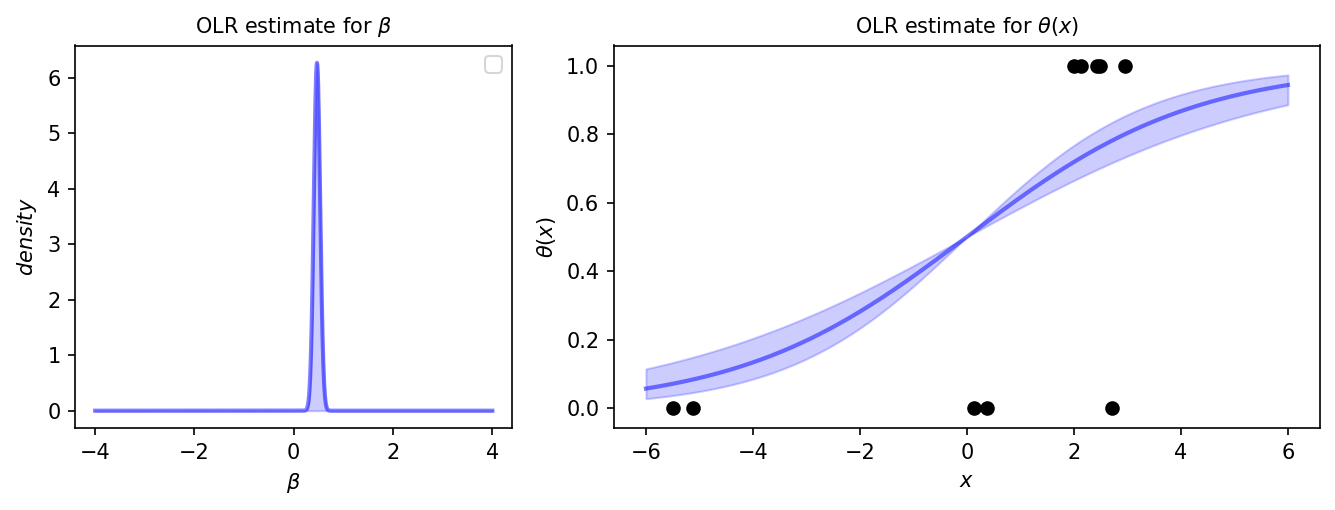

In [ ]:

import numpy as np
from thompson_sampling.models import OnlineLogisticRegression, BatchBayesLinReg
from thompson_sampling.multi_armed_bandits import contextual_categorical_bandit

theta = [0.6,1.0]
noise = 0.1



wee_x = np.random.uniform(-6,6,10)
wee_y = np.array([contextual_categorical_bandit(x,0, theta, noise)[0] for x in wee_x])




# OLR object
online_lr = OnlineLogisticRegression(1, .5, 1)
for i in range(len(wee_y)):
    online_lr.fit(wee_x[i].reshape(-1,1), wee_y[i].reshape(-1,1))
    
    
    
    
plot_online_logreg(online_lr, wee_x, wee_y)

In [ ]:
#export
from mpl_toolkits.axes_grid1 import ImageGrid


def prettify_ax(ax):
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_xlabel('$w_1$')
    ax.set_ylabel('$w_2$')
    return ax


def sample(n, weights):
    for _ in range(n):
        x = np.array([1, np.random.uniform(-1, 1)])
        y = np.dot(weights, x) + np.random.normal(0, .2)
        yield x, y
        
def sample(n, weights):
        X = np.array([[1, np.random.uniform(-1, 1)] for i in range(n)])
        y = [np.dot(weights, x) + np.random.normal(0, .2)  for x in X]
        return X, y       

        


def plot_param_through_time(model,N,n_samples,X,y,):

    w = np.linspace(-1, 1, 100)
    W = np.dstack(np.meshgrid(w, w))

    n_samples = 5
    fig = plt.figure(figsize=(7 * n_samples, 21))
    grid = ImageGrid(
        fig, 111,  # similar to subplot(111)
        nrows_ncols=(n_samples, 3),  # creates a n_samplesx3 grid of axes
        axes_pad=.5  # pad between axes in inch.
    )

    # We'll store the features and targets for plotting purposes
    xs = []
    ys = []





    for i, (xi, yi) in enumerate(zip(X,y)):

        pred_dist = model.predict(xi)

        # Prior weight distribution
        ax = prettify_ax(grid[3 * i])
        ax.set_title(f'Prior weight distribution #{i + 1}')
        ax.contourf(w, w, model.weights_dist.pdf(W), N, cmap='viridis')
        ax.scatter(*weights, color='red')  # true weights the model has to find

        # Update model
        model.learn(xi, yi)

        # Prior weight distribution
        ax = prettify_ax(grid[3 * i + 1])
        ax.set_title(f'Posterior weight distribution #{i + 1}')
        ax.contourf(w, w, model.weights_dist.pdf(W), N, cmap='viridis')
        ax.scatter(*weights, color='red')  # true weights the model has to find

        # Posterior target distribution
        xs.append(xi)
        ys.append(yi)
        posteriors = [model.predict(np.array([1, wi])) for wi in w]
        ax = prettify_ax(grid[3 * i + 2])
        ax.set_title(f'Posterior target distribution #{i + 1}')
        # Plot the old points and the new points
        ax.scatter([xi[1] for xi in xs[:-1]], ys[:-1])
        ax.scatter(xs[-1][1], ys[-1], marker='*')
        # Plot the predictive mean along with the predictive interval
        ax.plot(w, [p.mean() for p in posteriors], linestyle='--')
        cis = [p.interval(.95) for p in posteriors]
        ax.fill_between(
            x=w,
            y1=[ci[0] for ci in cis],
            y2=[ci[1] for ci in cis],
            alpha=.1
        )
        # Plot the true target distribution
        ax.plot(w, [np.dot(weights, [1, xi]) for xi in w], color='red')


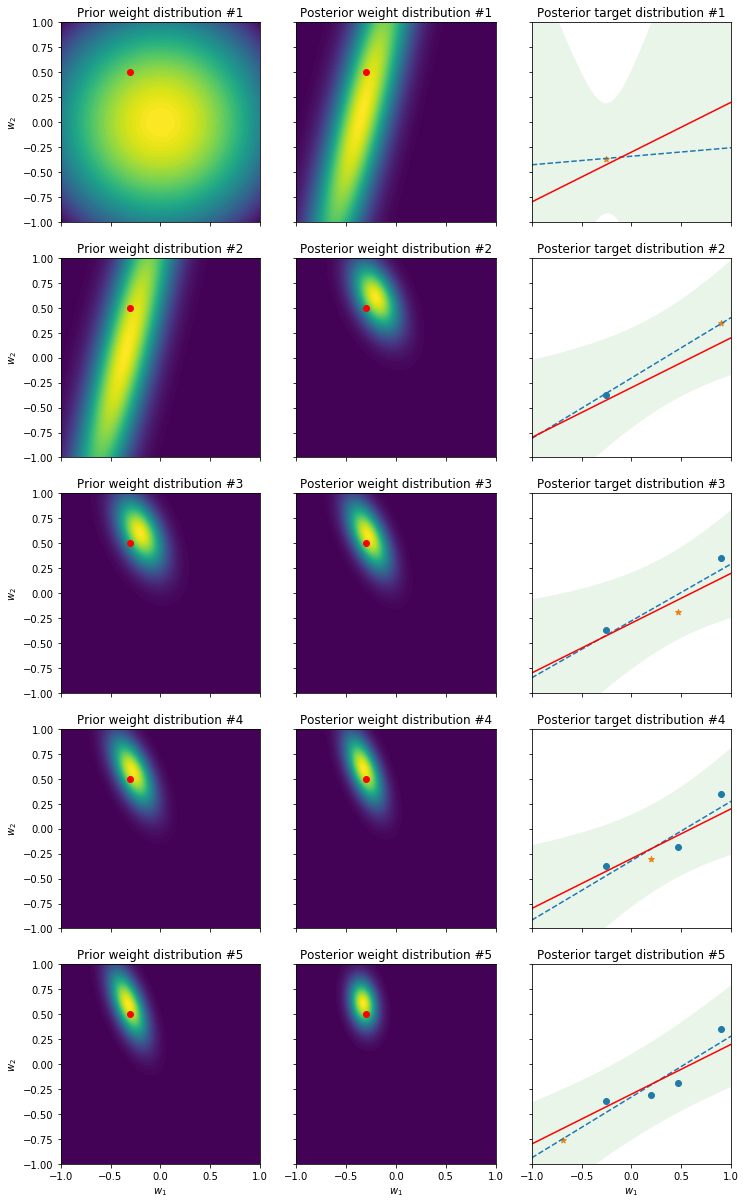

In [ ]:
def sample(n, weights):
    for _ in range(n):
        x = np.array([1, np.random.uniform(-1, 1)])
        y = np.dot(weights, x) + np.random.normal(0, .2)
        yield x, y
        
def sample(n, weights):
        X = np.array([[1, np.random.uniform(-1, 1)] for i in range(n)])
        y = [np.dot(weights, x) + np.random.normal(0, .2)  for x in X]
        return X, y       

        
model = BatchBayesLinReg(n_features=2, alpha=2, beta=25)

np.random.seed(42)

# Pick some true parameters that the model has to find
weights = np.array([-.3, .5])
        
n_samples = 5
N = 100

X,y = sample(n_samples, weights)

plot_param_through_time(model,N,n_samples,X,y)